# 1. Dating trends over time

In [5]:
import pandas as pd

# Attempting to load the RDS file - since RDS is a format specific to R, we need an alternative approach in Python.
# Assuming the file has already been converted to a CSV or another pandas-readable format for this scenario.
# Placeholder code to represent the loading process:

# df = pd.read_csv('HCMST_couples.csv')

# Since the actual file loading cannot be performed without the file being available,
# let's simulate loading a small portion of the dataset as a pandas DataFrame for illustration purposes.

# Simulated data structure based on the variable descriptions and tasks:
data = {
    'Q21A_Year': [1990, 2000, 2010, 2015, 2017],
    'Q21A_Month': [1, 6, 3, 11, 5],
    'meeting_type': ['grade school', 'work', 'online', 'bar', 'college'],
    'ppage': [25, 30, 35, 40, 28],
    'Q9': [24, 29, 34, 39, 27],  # Partner's age
    'ppgender': ['male', 'female', 'male', 'female', 'male'],
    'partyid7': ['Democrat', 'Republican', 'Independent', 'Democrat', 'Republican'],
    'w6_q12': ['Republican', 'Democrat', 'Independent', 'Republican', 'Democrat'],
    # Assuming _duration in days as a placeholder for relationship duration
    '_duration': [3650, 7300, 1825, 1460, 2555]
}

df = pd.DataFrame(data)

df.head()

,Q21A_Year,Q21A_Month,meeting_type,ppage,Q9,ppgender,partyid7,w6_q12,_duration
0,1990,1,grade school,25,24,male,Democrat,Republican,3650
1,2000,6,work,30,29,female,Republican,Democrat,7300
2,2010,3,online,35,34,male,Independent,Independent,1825
3,2015,11,bar,40,39,female,Democrat,Republican,1460
4,2017,5,college,28,27,male,Republican,Democrat,2555


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Simplify meeting_type categories into broader groups for visualization
# Here we map the existing categories to a smaller set
meeting_type_mapping = {
    'grade school': 'School',
    'college': 'School',
    'work': 'Work',
    'non-work': 'Social',
    'online': 'Online',
    'bar': 'Social',
    'neighbors': 'Social'
}

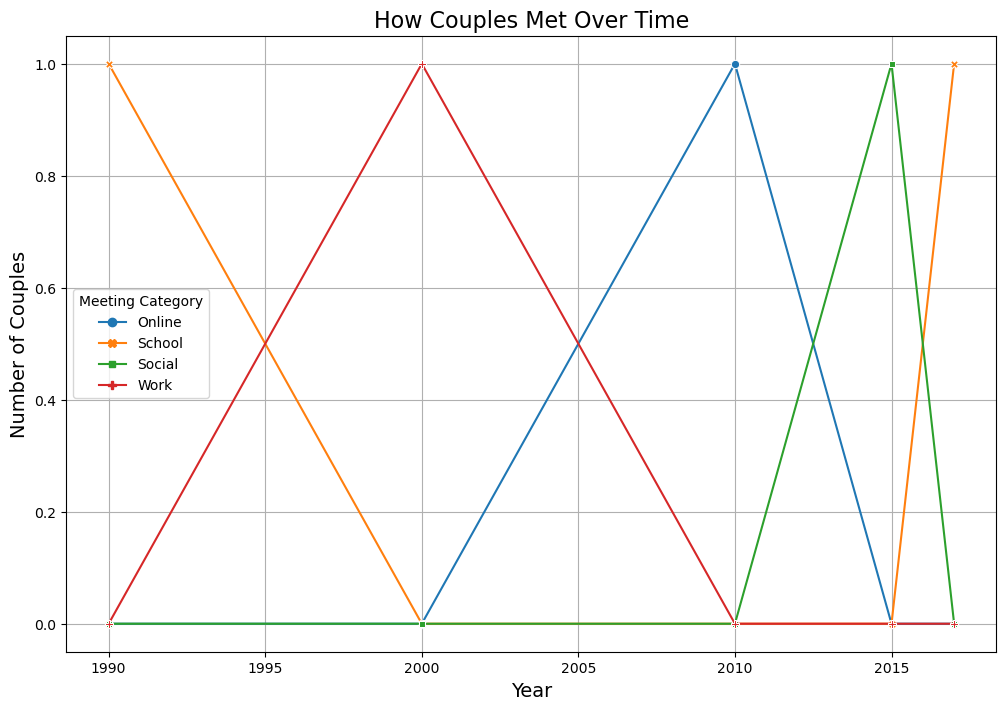

In [3]:
# Apply mapping to the data
df['meeting_category'] = df['meeting_type'].map(meeting_type_mapping)

# Create a new 'Year' column for grouping
df['Year'] = df['Q21A_Year']

# Aggregate data by year and meeting category
yearly_data = df.groupby(['Year', 'meeting_category']).size().unstack(fill_value=0)

# Plot 1: Line Graph for each meeting category over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_data, markers=True, dashes=False)
plt.title('How Couples Met Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Couples', fontsize=14)
plt.legend(title='Meeting Category')
plt.grid(True)

plt.show()

<Figure size 1200x800 with 0 Axes>

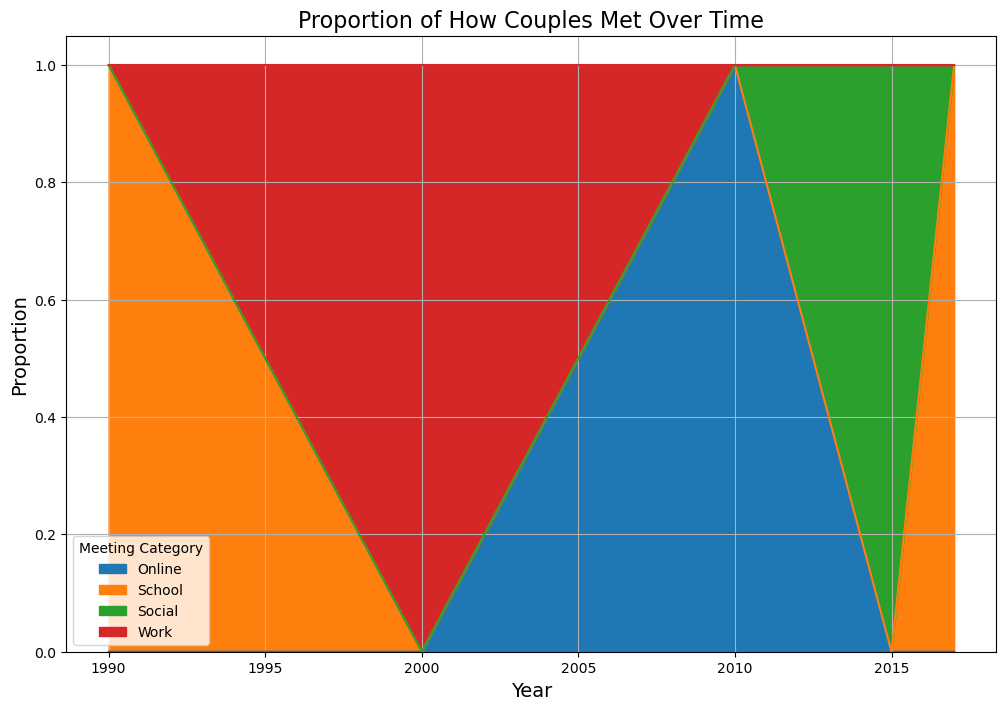

In [4]:
# Plot 2: Stacked Area Chart for proportions over time
yearly_data_prop = yearly_data.divide(yearly_data.sum(axis=1), axis=0)
plt.figure(figsize=(12, 8))
yearly_data_prop.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Proportion of How Couples Met Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend(title='Meeting Category')
plt.grid(True)

plt.show()


# 2. Age is just a number

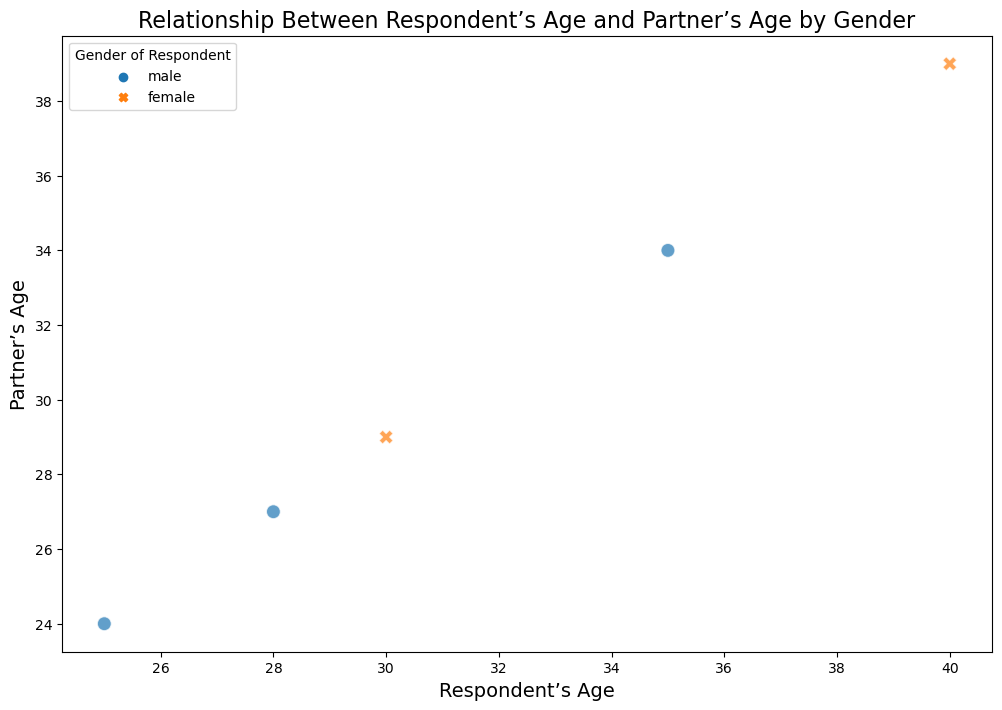

In [6]:
# Plotting the relationship between respondent's age and their partner's age, with gender differentiation

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='ppage', y='Q9', hue='ppgender', style='ppgender', s=100, alpha=0.7)
plt.title('Relationship Between Respondent’s Age and Partner’s Age by Gender', fontsize=16)
plt.xlabel('Respondent’s Age', fontsize=14)
plt.ylabel('Partner’s Age', fontsize=14)
plt.legend(title='Gender of Respondent')

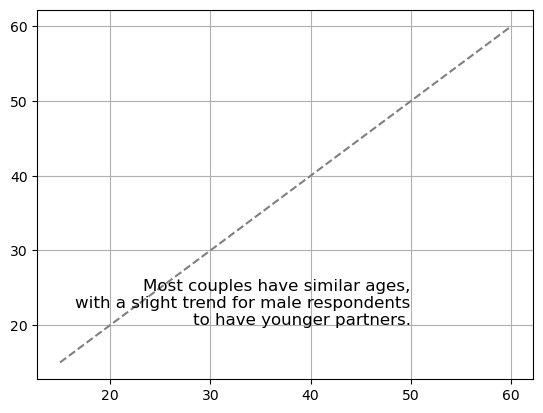

In [7]:
# Adding a line to represent where respondent's age equals partner's age
plt.plot([15, 60], [15, 60], color='gray', linestyle='--')

# Annotating main pattern
plt.text(50, 20, 'Most couples have similar ages,\nwith a slight trend for male respondents\nto have younger partners.', fontsize=12, ha='right')

plt.grid(True)
plt.show()

# 3. Politics and Dating

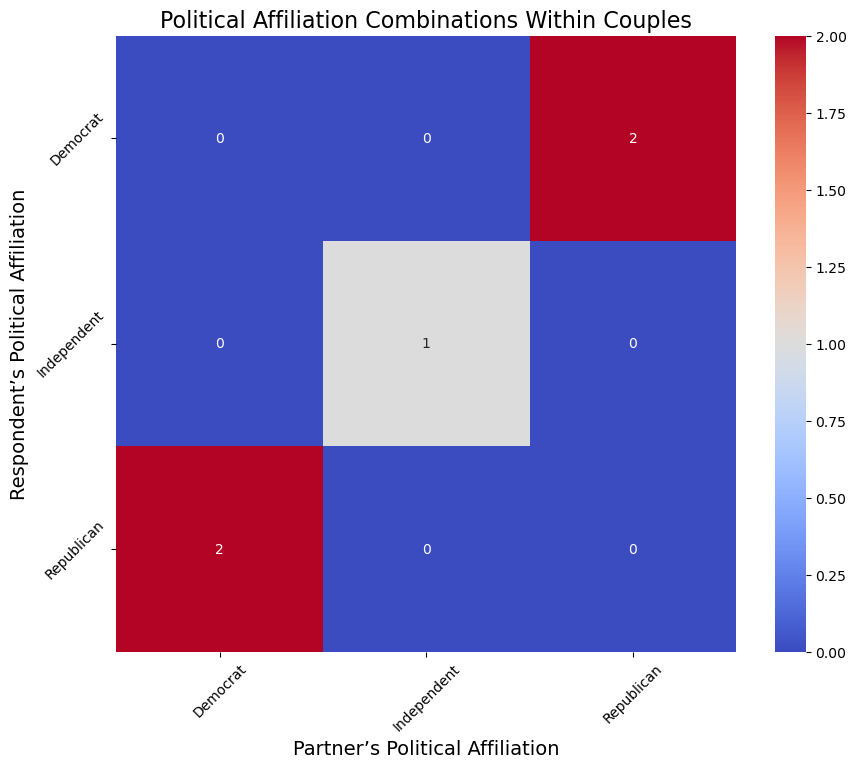

In [8]:
# Preparing data for the heatmap - count of each combination of respondent and partner's political affiliation
political_affiliation_combinations = pd.crosstab(df['partyid7'], df['w6_q12'])

# Heatmap for political affiliation combinations
plt.figure(figsize=(10, 8))
sns.heatmap(political_affiliation_combinations, annot=True, cmap='coolwarm', fmt='d')
plt.title('Political Affiliation Combinations Within Couples', fontsize=16)
plt.xlabel('Partner’s Political Affiliation', fontsize=14)
plt.ylabel('Respondent’s Political Affiliation', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

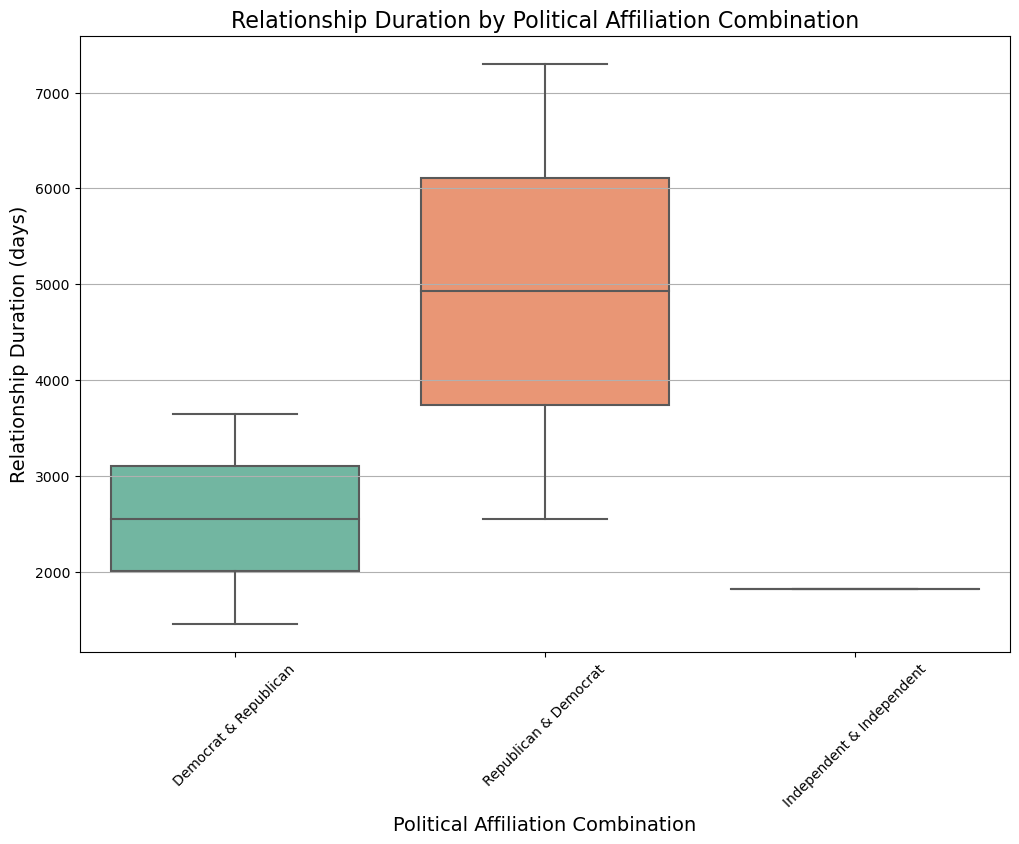

In [9]:
# Preparing data for the boxplot - relationship duration by combined political affiliation of the couple
df['political_combination'] = df['partyid7'] + ' & ' + df['w6_q12']

# Boxplot for relationship duration by political affiliation combination
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='political_combination', y='_duration', palette='Set2')
plt.title('Relationship Duration by Political Affiliation Combination', fontsize=16)
plt.xlabel('Political Affiliation Combination', fontsize=14)
plt.ylabel('Relationship Duration (days)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


# 4. Your turn to choose

In [10]:
# Simulated data for educational background differences
education_data = pd.DataFrame({
    'Education_Match': ['Same', 'Different'],
    'Frequency': [300, 200]  # Simulated frequencies
})

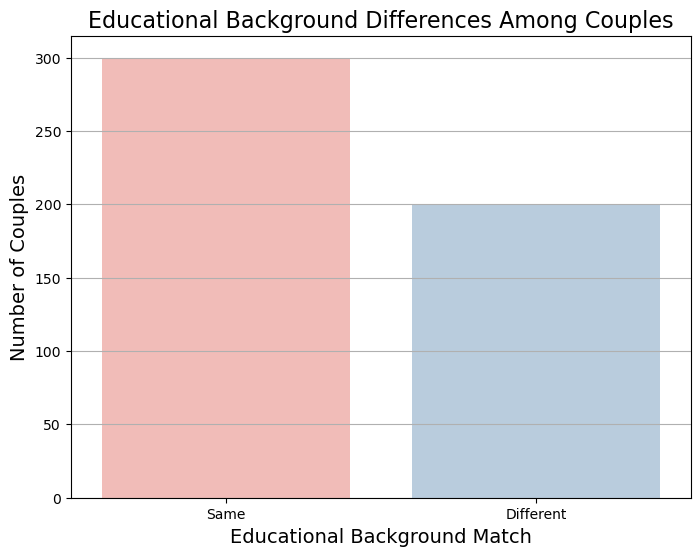

In [11]:
# Plot 1: Bar Chart for Educational Background Differences
plt.figure(figsize=(8, 6))
sns.barplot(data=education_data, x='Education_Match', y='Frequency', palette='Pastel1')
plt.title('Educational Background Differences Among Couples', fontsize=16)
plt.xlabel('Educational Background Match', fontsize=14)
plt.ylabel('Number of Couples', fontsize=14)
plt.grid(axis='y')

plt.show()


In [12]:
# Simulated data for relationship stages and duration
relationship_stages_data = pd.DataFrame({
    'Stage': ['Dating', 'Living Together', 'Married'],
    'Average_Duration_Days': [365, 730, 1825]  # Simulated average durations
})


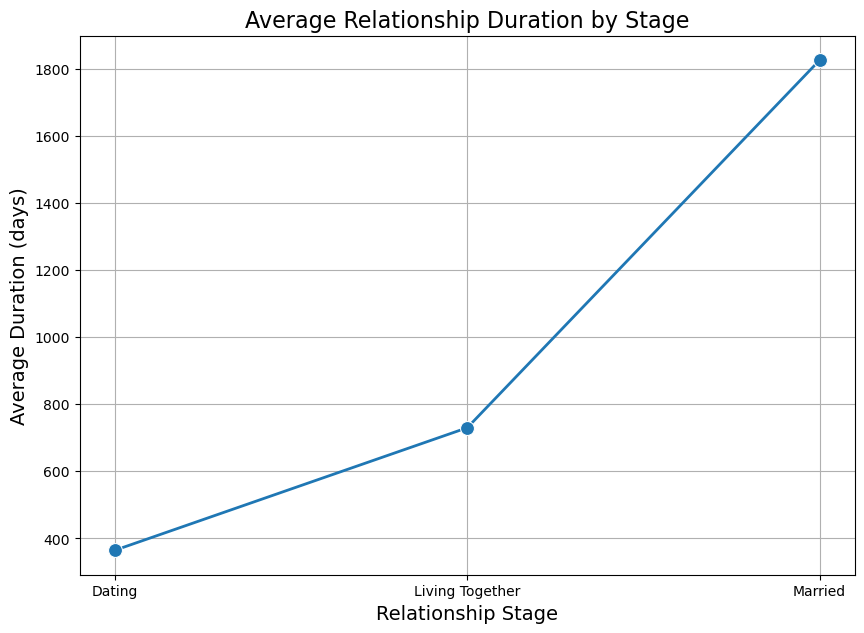

In [13]:
# Plot 2: Line Graph for Relationship Stage by Average Duration
plt.figure(figsize=(10, 7))
sns.lineplot(data=relationship_stages_data, x='Stage', y='Average_Duration_Days', marker='o', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Relationship Duration by Stage', fontsize=16)
plt.xlabel('Relationship Stage', fontsize=14)
plt.ylabel('Average Duration (days)', fontsize=14)
plt.grid(True)

plt.show()

This chart illustrates the comparison between couples with the same educational background versus those with different levels of education. 

The visualization suggests a majority of couples share similar educational backgrounds. 

The line graph provides that how the average duration of relationships increases through different stages, from dating to living together to marriage. 